<a href="https://www.kaggle.com/code/spencerwd/airline-price-prediction?scriptVersionId=164427190" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as pt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("/kaggle/input/flight-price-prediction/Clean_Dataset.csv")
df.head(10)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


In [3]:
df = df.drop('Unnamed: 0', axis=1)

In [4]:
df = df.drop("flight", axis=1)

In [5]:
df.isnull()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
300148,False,False,False,False,False,False,False,False,False,False
300149,False,False,False,False,False,False,False,False,False,False
300150,False,False,False,False,False,False,False,False,False,False
300151,False,False,False,False,False,False,False,False,False,False


In [6]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   source_city       300153 non-null  object 
 2   departure_time    300153 non-null  object 
 3   stops             300153 non-null  object 
 4   arrival_time      300153 non-null  object 
 5   destination_city  300153 non-null  object 
 6   class             300153 non-null  object 
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 22.9+ MB


In [8]:
df.shape

(300153, 10)

**Comparing Price against Airline Companies**

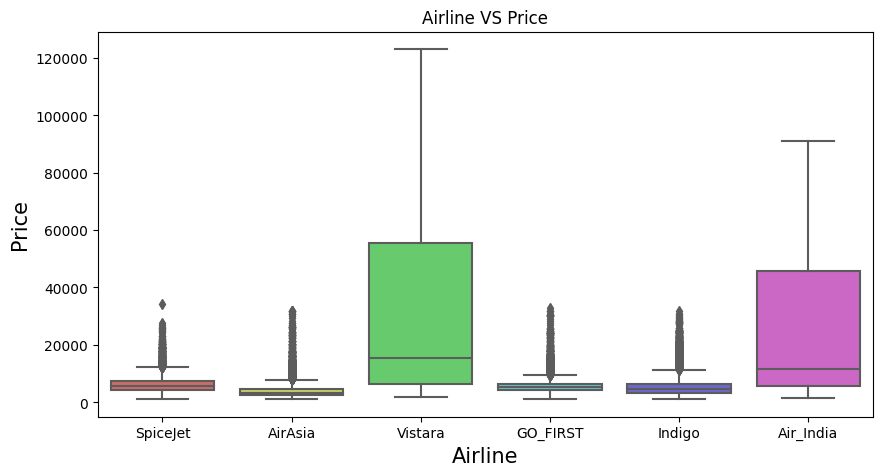

In [9]:
pt.figure(figsize=(10,5))
sns.boxplot(x=df['airline'], y=df['price'], palette='hls')
pt.title('Airline VS Price')
pt.xlabel('Airline', fontsize=15)
pt.ylabel('Price', fontsize=15)
pt.show()

**Comparing whether the Airline Prices are affected by Class**

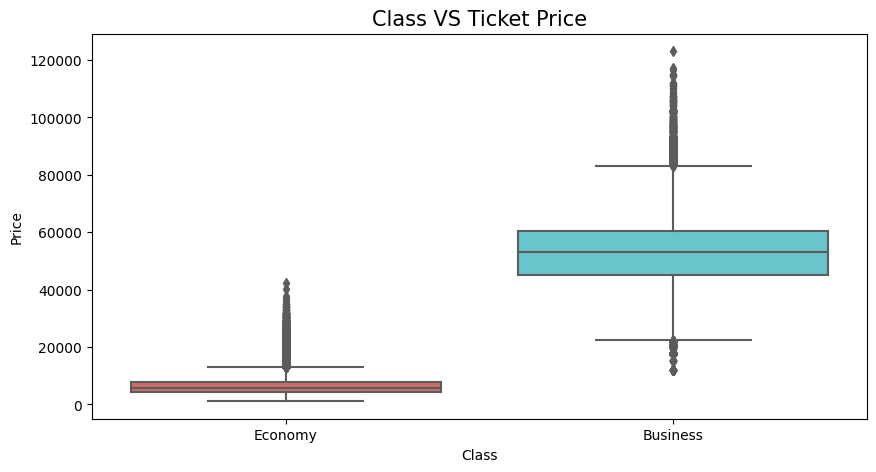

In [10]:
pt.figure(figsize=(10,5))
sns.boxplot(x=df['class'], y=df['price'], palette='hls')
pt.title('Class VS Ticket Price', fontsize=15)
pt.xlabel('Class', fontsize=10)
pt.ylabel('Price', fontsize=10)
pt.show()

**Do Stop affect Prices**

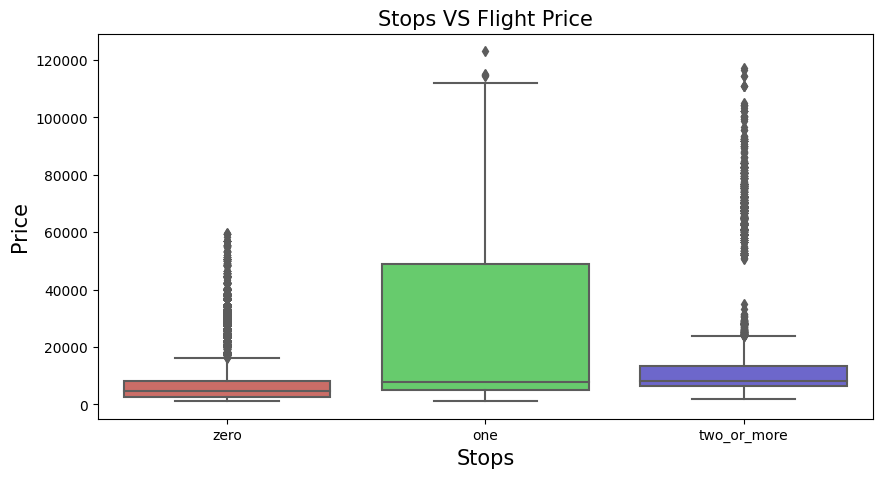

In [11]:
pt.figure(figsize=(10,5))
sns.boxplot(x=df['stops'], y=df['price'], palette='hls')
pt.title("Stops VS Flight Price", fontsize=15)
pt.xlabel("Stops", fontsize=15)
pt.ylabel("Price", fontsize=15)
pt.show()

**Comparing Departure and Arrival time with Prices**

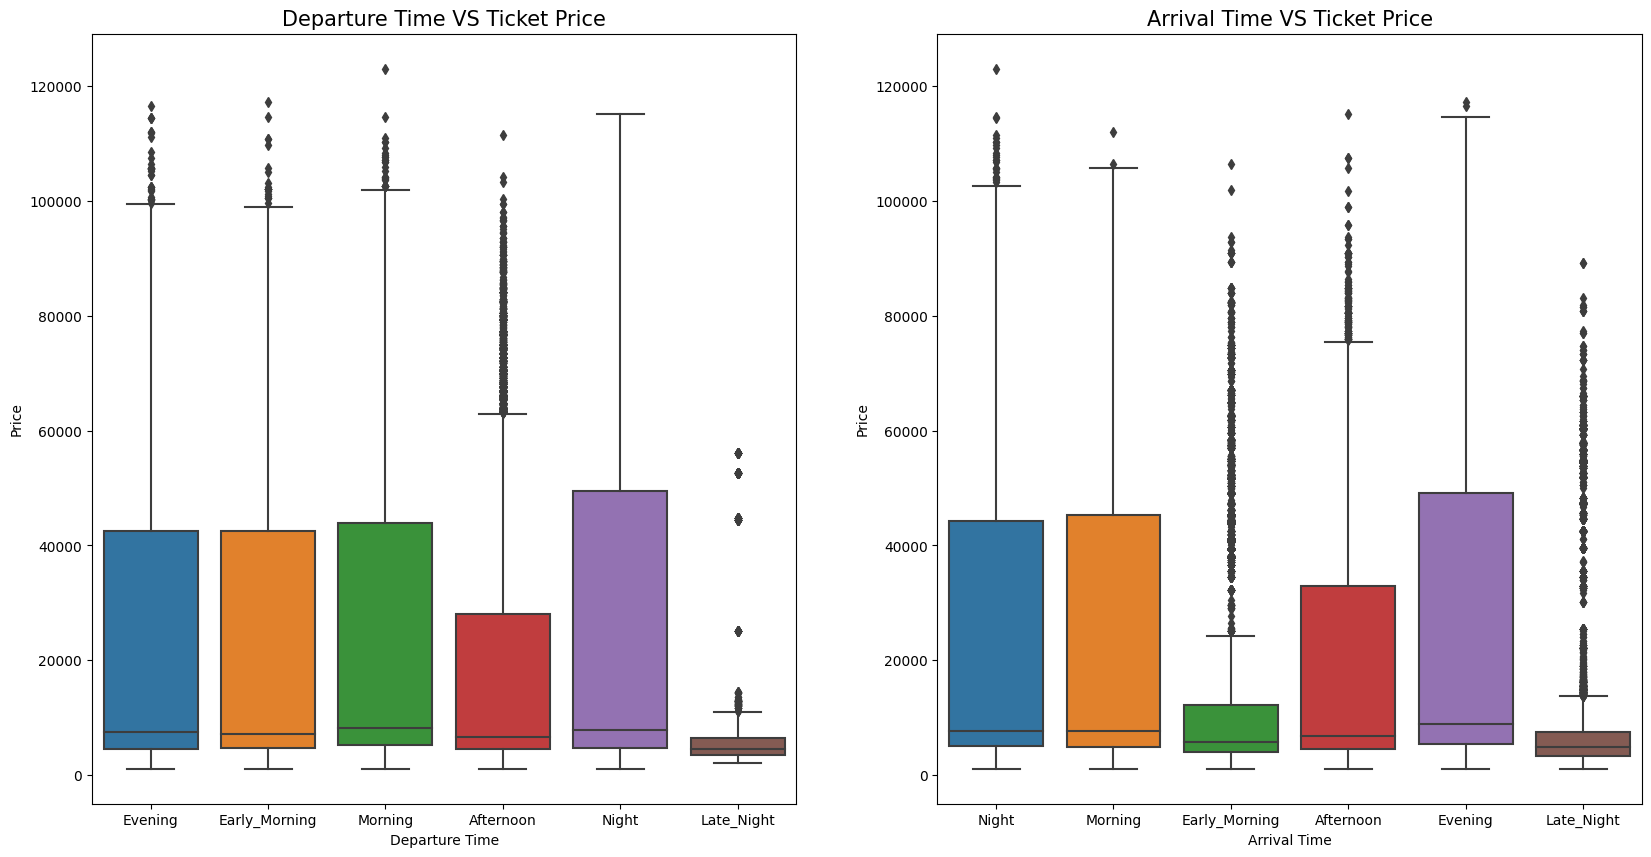

In [12]:
pt.figure(figsize=(20, 10))
pt.subplot(1, 2, 1)
sns.boxplot(x=df['departure_time'], y=df['price'])
pt.title('Departure Time VS Ticket Price', fontsize=15)
pt.xlabel('Departure Time', fontsize=10)
pt.ylabel('Price', fontsize=10)
pt.subplot(1,2,2)
sns.boxplot(x=df['arrival_time'], y=df['price'])
pt.title('Arrival Time VS Ticket Price', fontsize=15)
pt.xlabel('Arrival Time', fontsize=10)
pt.ylabel('Price', fontsize=10)
pt.show()

**Does a particular City affect prices**

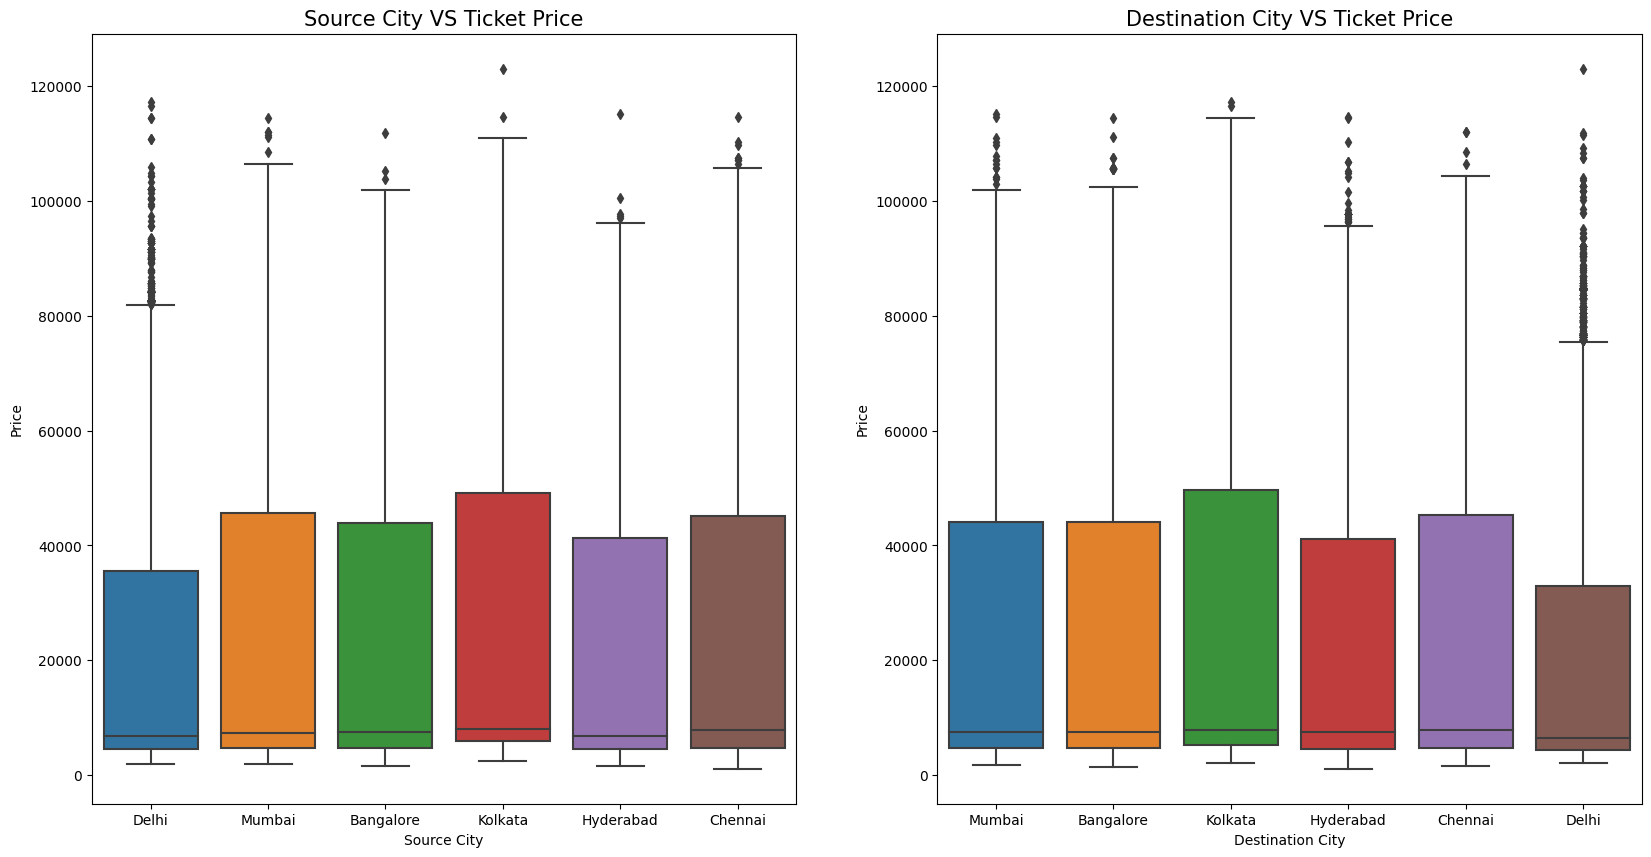

In [13]:
pt.figure(figsize=(20, 10))
pt.subplot(1, 2, 1)
sns.boxplot(x=df['source_city'], y=df['price'])
pt.title('Source City VS Ticket Price', fontsize=15)
pt.xlabel('Source City', fontsize=10)
pt.ylabel('Price', fontsize=10)
pt.subplot(1,2,2)
sns.boxplot(x=df['destination_city'], y=df['price'])
pt.title('Destination City VS Ticket Price', fontsize=15)
pt.xlabel('Destination City', fontsize=10)
pt.ylabel('Price', fontsize=10)
pt.show()

**Graph to visualize whether number of days affect the prices**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

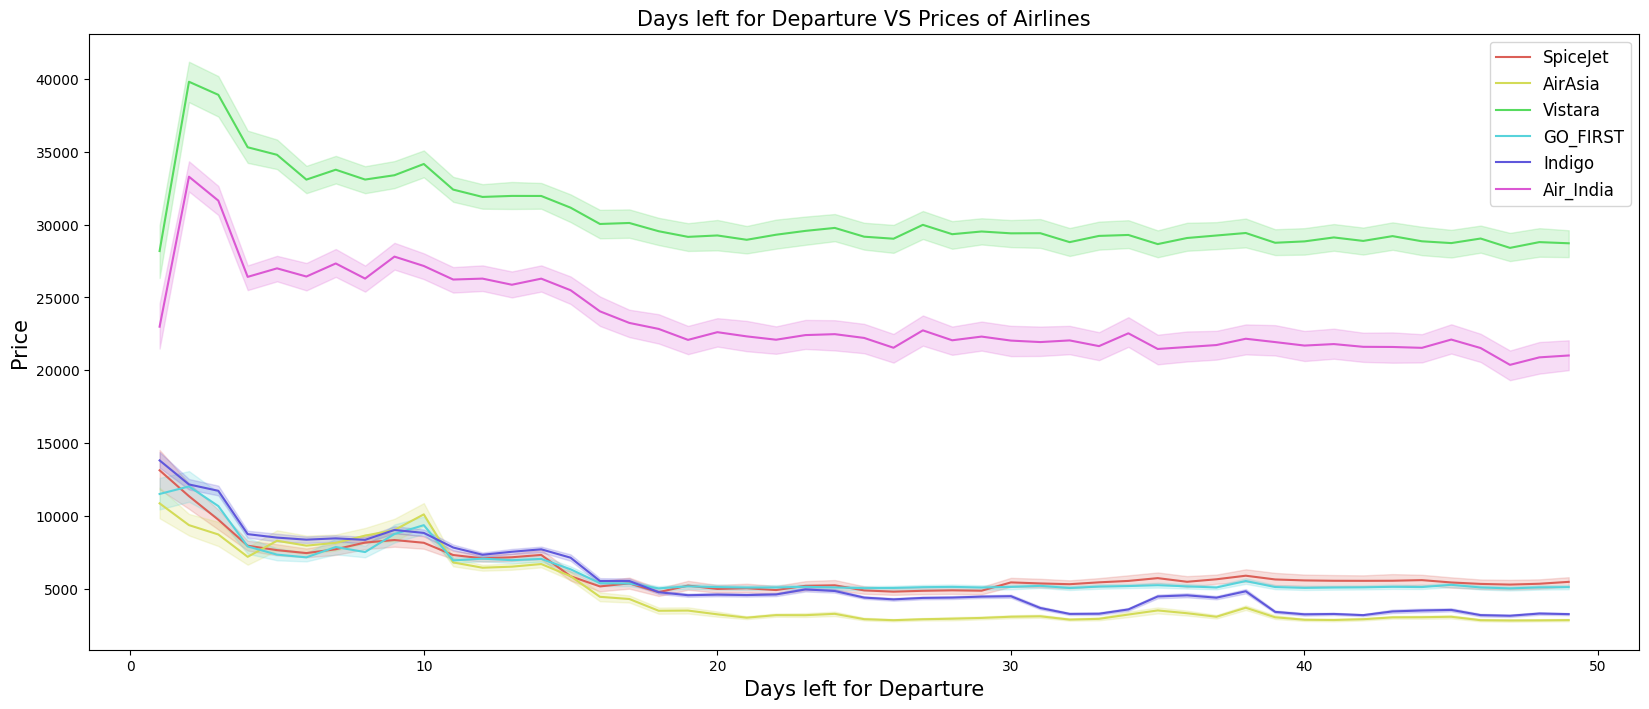

In [14]:
pt.figure(figsize= (20, 8))
sns.lineplot(x=df['days_left'], y=df['price'], color='blue', hue=df['airline'], palette='hls')
pt.title('Days left for Departure VS Prices of Airlines', fontsize=15)
pt.legend(fontsize=12)
pt.xlabel('Days left for Departure', fontsize=15)
pt.ylabel('Price', fontsize=15)
pt.show()

In [15]:
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]= le.fit_transform(df[col])

In [16]:
x = df.drop(['price'], axis=1)
y = df['price']

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((210107, 9), (90046, 9), (210107,), (90046,))

In [18]:
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.fit_transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)  

In [19]:
dt = DecisionTreeRegressor(random_state=42)

dt.fit(x_train, y_train)

# Predict the values for the training and testing sets
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

# Compute the accuracy, MSE, and R2 for the training set
accuracy_train = dt.score(x_train, y_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Compute the accuracy, MSE, and R2 for the testing set
accuracy_test = dt.score(x_test, y_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Accuracy - Train: {:} Test: {:}".format(accuracy_train, accuracy_test))
print("MSE - Train: {:} Test: {:}".format(mse_train, mse_test))
print("R2 - Train: {:} Test: {:}".format(r2_train, r2_test))

Accuracy - Train: 0.9993813250067048 Test: 0.9461809304968603
MSE - Train: 318871.17609519593 Test: 27698872.227363735
R2 - Train: 0.9993813250067048 Test: 0.9461809304968603


In [20]:
rf = RandomForestRegressor(n_estimators=10, random_state=42)

rf.fit(x_train, y_train)

# Predict the values for the training and testing sets
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

# Compute the accuracy, MSE, and R2 for the training set
accuracy_train = rf.score(x_train, y_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Compute the accuracy, MSE, and R2 for the testing set
accuracy_test = rf.score(x_test, y_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Accuracy - Train: {:} Test: {:}".format(accuracy_train, accuracy_test))
print("MSE - Train: {:} Test: {:}".format(mse_train, mse_test))
print("R2 - Train: {:} Test: {:}".format(r2_train, r2_test))

Accuracy - Train: 0.9968919955333009 Test: 0.9624071138728673
MSE - Train: 1601896.0687693392 Test: 19347799.192859273
R2 - Train: 0.9968919955333009 Test: 0.9624071138728673


In [21]:
gb = GradientBoostingRegressor(loss='squared_error', learning_rate=0.1, n_estimators=100, max_depth=3)

gb.fit(x_train, y_train)

y_pred_train = gb.predict(x_train)
y_pred_test = gb.predict(x_test)

accuracy_train = gb.score(x_train, y_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)


accuracy_test = gb.score(x_test, y_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Accuracy - Train: {:} Test: {:}".format(accuracy_train, accuracy_test))
print("MSE - Train: {:} Test: {:}".format(mse_train, mse_test))
print("R2 - Train: {:} Test: {:}".format(r2_train, r2_test))

Accuracy - Train: 0.9523303311529736 Test: 0.9514550798583006
MSE - Train: 24569416.145881403 Test: 24984444.225927446
R2 - Train: 0.9523303311529736 Test: 0.9514550798583006
